In [1]:
import pandas as pd

In [3]:
#Recupero la tabella allArea salvata in sanFrancisco.csv
allArea = pd.read_csv('sanFrancisco.csv')
del allArea['Unnamed: 0']
allArea.head()

,geohash_list,StartingVehicles,EndingVehicles,TotNumberRecordVehicles,maxSpeed_km/h,AverageSpeed,OutEdges,InEdges,VehiclesNight(24-5 am),VehiclesMorning(6-12 am),...,AverageAcceleration_m/s^2,NumberTotalPointInterest,"NumberCulturalPoint(""Museum-Attraction-Ruins"")","NumberFinancePoint(""Bank-Company"")","NumberHealthPoint(""Hospital-Dentist-Pharmacy"")","NumberTrasportationPoint(""Fuel-BusStation-TaxiStop"")","NumberEducationPoint(""University-Library"")","NumberEnterteimentPoint(""Cinema-Theatre-Zoo-Stadium-SwimmingPool"")",RecordWeekend,RecordWeek
0,9q8yuj,3,1,2293,147.771689,17.120311,3,1,1031,187,...,0.186663,0,0,0,0,0,0,0,851,1442
1,9q8yut,49,51,17256,149.291544,18.472934,37,39,4817,3471,...,0.155163,2,2,0,0,0,0,0,6636,10620
2,9q8yuh,1,1,2193,149.594547,15.923362,1,1,669,275,...,0.152058,4,2,0,1,1,0,0,931,1262
3,9q8yum,13,17,8386,146.337848,18.008263,8,12,2277,1319,...,0.171032,3,0,0,2,1,0,0,2766,5620
4,9q8yur,0,0,0,NaN,NaN,0,0,0,0,...,NaN,0,0,0,0,0,0,0,0,0


In [15]:
attributes = [col for col in allArea.columns]

allArea[attributes] = allArea[attributes].fillna(0)

In [ ]:
#Verifico quelli che sono gli attributi all'interno di allArea

for c in allArea.columns:
    print(c)

geohash_list
StartingVehicles
EndingVehicles
TotNumberRecordVehicles
maxSpeed_km/h
AverageSpeed
OutEdges
InEdges
VehiclesNight(24-5 am)
VehiclesMorning(6-12 am)
VehiclesAfternoon(13-18 pm)
VehiclesEvening(19-23 pm)
Density_n/km^2
AccelarationMax
AverageAcceleration_m/s^2
NumberTotalPointInterest
NumberCulturalPoint("Museum-Attraction-Ruins")
NumberFinancePoint("Bank-Company")
NumberHealthPoint("Hospital-Dentist-Pharmacy")
NumberTrasportationPoint("Fuel-BusStation-TaxiStop")
NumberEducationPoint("University-Library")
NumberEnterteimentPoint("Cinema-Theatre-Zoo-Stadium-SwimmingPool")
RecordWeekend
RecordWeek


In [16]:
#importo ora uno tra allStart o allEnd (entrambi possiedono id_geohashPartenza ed id_geohashArrivo)
allStart = pd.read_csv('allStart.csv')
del allStart['Unnamed: 0']
allStart.head()

,driver,longitude,latitude,geohash_area,end
0,ashgati,-122.39448,37.75155,9q8yyb,9q8yyb
1,ashgati,-122.40603,37.77532,9q8yys,9q8yyb
2,ashgati,-122.39364,37.75149,9q8yyb,9q8yyb
3,ashgati,-122.39404,37.75056,9q8yyb,9q8yyb
4,ashgati,-122.39422,37.75218,9q8yyb,9q8yyb


            Come si può notare, il dataframe allStart possiede sia area di inzio che fine

            Come prima cosa ho bisogno di creare una tabella contenente idPartenza,IdArrivo e flusso(y)

In [ ]:
#creo le liste id partenza ed arrivo per area

i = 0
idPartenza = []
idArrivo = []
allAreaLen = len(allArea['geohash_list'])
while(i<allAreaLen):
    j=0
    while(j<allAreaLen):
        idPartenza.append(allArea['geohash_list'][i])
        idArrivo.append(allArea['geohash_list'][j])
        j=j+1
    i=i+1

In [ ]:
#creo il dataframe che contiene idPartenza idArrivo e flusso
df1 = pd.DataFrame()
df1['IdPartenza'] = idPartenza
df1['IdArrivo'] = idArrivo
df1.head()

,IdPartenza,IdArrivo
0,9q8yuj,9q8yuj
1,9q8yuj,9q8yut
2,9q8yuj,9q8yuh
3,9q8yuj,9q8yum
4,9q8yuj,9q8yur


In [ ]:
#mi manca da calcolare il numero di veicoli che partono da IdPartenza_i ed arrivano ad IdArrivo_i
i = 0
result = []
alldf1Len = len(df1['IdArrivo'])
while(i<alldf1Len):
    areaPartenza = allStart[allStart.geohash_area == df1['IdPartenza'][i]]
    areaPartenza1 = areaPartenza[areaPartenza.end == df1['IdArrivo'][i]]
    
    result.append(len(areaPartenza1))

    i=i+1

In [ ]:
df1['y'] = result
df1

,IdPartenza,IdArrivo,y
0,9q8yuj,9q8yuj,0
1,9q8yuj,9q8yut,0
2,9q8yuj,9q8yuh,0
3,9q8yuj,9q8yum,0
4,9q8yuj,9q8yur,0
...,...,...,...
68116,9q8yu1,9q8yu0,0
68117,9q8yu1,9q8yu9,0
68118,9q8yu1,9q8yu8,0
68119,9q8yu1,9q8yu3,0


In [ ]:
#primo dataframe creato, ora dovrei fare un merge tra allArea e df1
#difficile che si possa fare con qualche libreria, dovrei utilizzare una funzione

df2 = pd.DataFrame()

df2['idPartenza'] = idPartenza
df2['idArrivo'] = idArrivo

In [ ]:
#creare il grande dataframe per effettuare training e test
i = 0
StartingVehicleA = []
EndingVehicles =[]
TotNumberRecordVehicles =[]
maxSpeed_km =[]
AverageSpeed =[]
OutEdges =[]
InEdges =[]
VehiclesNight =[]
VehiclesMorning =[]
VehiclesAfternoon =[]
VehiclesEvening =[]
Density_n =[]
AccelarationMax =[]
AverageAcceleration =[]
NumberTotalPointInterest =[]
NumberCulturalPoint =[]
NumberFinancePoint =[]
NumberHealthPoint =[]
NumberTrasportationPoint =[]
NumberEducationPoint = []
NumberEnterteimentPoint = []
RecordWeekend =[]
RecordWeek =[]

StartingVehicleB = []
EndingVehiclesB =[]
TotNumberRecordVehiclesB =[]
maxSpeed_kmB =[]
AverageSpeedB =[]
OutEdgesB =[]
InEdgesB =[]
VehiclesNightB =[]
VehiclesMorningB =[]
VehiclesAfternoonB =[]
VehiclesEveningB =[]
Density_nB =[]
AccelarationMaxB =[]
AverageAcceleration_mB =[]
NumberTotalPointInterestB =[]
NumberCulturalPointB =[]
NumberFinancePointB =[]
NumberHealthPointB =[]
NumberTrasportationPointB =[]
NumberEducationPointB =[]
NumberEnterteimentPointB =[]
RecordWeekendB =[]
RecordWeekB =[]


allAreaLen = len(allArea['geohash_list'])
while(i<allAreaLen):
    j=0
    while(j<allAreaLen):
        
        StartingVehicleA.append(allArea['StartingVehicles'][i])
        EndingVehicles.append(allArea['EndingVehicles'][i])
        TotNumberRecordVehicles.append(allArea['TotNumberRecordVehicles'][i])
        maxSpeed_km.append(allArea['maxSpeed_km/h'][i])
        AverageSpeed.append(allArea['AverageSpeed'][i])
        OutEdges.append(allArea['OutEdges'][i])
        InEdges.append(allArea['InEdges'][i])
        VehiclesNight.append(allArea['VehiclesNight(24-5 am)'][i])
        VehiclesMorning.append(allArea['VehiclesMorning(6-12 am)'][i])
        VehiclesAfternoon.append(allArea['VehiclesAfternoon(13-18 pm)'][i])
        VehiclesEvening.append(allArea['VehiclesEvening(19-23 pm)'][i])
        Density_n.append(allArea['Density_n/km^2'][i])
        AccelarationMax.append(allArea['AccelarationMax'][i])
        AverageAcceleration.append(allArea['AverageAcceleration_m/s^2'][i])
        NumberTotalPointInterest.append(allArea['NumberTotalPointInterest'][i])
        NumberCulturalPoint.append(allArea['NumberCulturalPoint("Museum-Attraction-Ruins")'][i])
        NumberEducationPoint.append(allArea['NumberEducationPoint("University-Library")'][i])
        NumberEnterteimentPoint.append(allArea['NumberEnterteimentPoint("Cinema-Theatre-Zoo-Stadium-SwimmingPool")'][i])
        NumberFinancePoint.append(allArea['NumberFinancePoint("Bank-Company")'][i])
        NumberHealthPoint.append(allArea['NumberHealthPoint("Hospital-Dentist-Pharmacy")'][i])
        NumberTrasportationPoint.append(allArea['NumberTrasportationPoint("Fuel-BusStation-TaxiStop")'][i])
        RecordWeekend.append(allArea['RecordWeekend'][i])
        RecordWeek.append(allArea['RecordWeek'][i])
        
        
        
        
        
        
        #B
        
        
        StartingVehicleB.append(allArea['StartingVehicles'][j])
        EndingVehiclesB.append(allArea['EndingVehicles'][j])
        TotNumberRecordVehiclesB.append(allArea['TotNumberRecordVehicles'][j])
        maxSpeed_kmB.append(allArea['maxSpeed_km/h'][j])
        AverageSpeedB.append(allArea['AverageSpeed'][j])
        OutEdgesB.append(allArea['OutEdges'][j])
        InEdgesB.append(allArea['InEdges'][j])
        VehiclesNightB.append(allArea['VehiclesNight(24-5 am)'][j])
        VehiclesMorningB.append(allArea['VehiclesMorning(6-12 am)'][j])
        VehiclesAfternoonB.append(allArea['VehiclesAfternoon(13-18 pm)'][j])
        VehiclesEveningB.append(allArea['VehiclesEvening(19-23 pm)'][j])
        Density_nB.append(allArea['Density_n/km^2'][j])
        AccelarationMaxB.append(allArea['AccelarationMax'][j])
        AverageAcceleration_mB.append(allArea['AverageAcceleration_m/s^2'][j])
        NumberTotalPointInterestB.append(allArea['NumberTotalPointInterest'][j])
        NumberCulturalPointB.append(allArea['NumberCulturalPoint("Museum-Attraction-Ruins")'][j])
        NumberEducationPointB.append(allArea['NumberEducationPoint("University-Library")'][j])
        NumberEnterteimentPointB.append(allArea['NumberEnterteimentPoint("Cinema-Theatre-Zoo-Stadium-SwimmingPool")'][j])
        NumberFinancePointB.append(allArea['NumberFinancePoint("Bank-Company")'][j])
        NumberHealthPointB.append(allArea['NumberHealthPoint("Hospital-Dentist-Pharmacy")'][j])
        NumberTrasportationPointB.append(allArea['NumberTrasportationPoint("Fuel-BusStation-TaxiStop")'][j])
        RecordWeekendB.append(allArea['RecordWeekend'][j])
        RecordWeekB.append(allArea['RecordWeek'][j])
        
        
        
        
        j=j+1
    i=i+1

In [ ]:
df2['StartingVehiclesA'] = StartingVehicleA
df2['EndingVehiclesA'] = EndingVehicles
df2['TotNumberRecordVehiclesA'] = TotNumberRecordVehicles
df2['maxSpeedKm/hA'] = maxSpeed_km
df2['AverageSpeedA'] = AverageSpeed
df2['OutEdgesA'] =OutEdges
df2['InEdgesA'] =InEdges
df2['VehiclesNightA'] = VehiclesNight
df2['VehiclesMorningA'] =VehiclesMorning
df2['VehiclesAfternoonA'] = VehiclesAfternoon
df2['VehiclesEveningA'] =VehiclesEvening
df2['Density_n/km^2A'] =Density_n
df2['AccelerationMaxA'] = AccelarationMax
df2['AverageAccelerationA'] = AverageAcceleration
df2['NumberTotalPointInterestA'] = NumberTotalPointInterest
df2['NumberCulturalPointA'] = NumberCulturalPoint
df2['NumberEducationPointA']= NumberEducationPoint
df2['NumberEnterteimentPointA'] = NumberEnterteimentPoint
df2['NumberFinancePointA'] = NumberFinancePoint
df2['NumberHealthPointA'] = NumberHealthPoint
df2['NumberTrasportationPointA'] = NumberTrasportationPoint
df2['RecordWeekendA'] = RecordWeekend
df2['RecordWeekA'] = RecordWeek


#B

df2['StartingVehiclesB'] = StartingVehicleB
df2['EndingVehiclesB'] = EndingVehiclesB
df2['TotNumberRecordVehiclesB'] = TotNumberRecordVehiclesB
df2['maxSpeedKm/hB'] = maxSpeed_kmB
df2['AverageSpeedB'] = AverageSpeedB
df2['OutEdgesB'] =OutEdgesB
df2['InEdgesB'] =InEdgesB
df2['VehiclesNightB'] = VehiclesNightB
df2['VehiclesMorningB'] =VehiclesMorningB
df2['VehiclesAfternoonB'] = VehiclesAfternoonB
df2['VehiclesEveningB'] =VehiclesEveningB
df2['Density_n/km^2B'] =Density_nB
df2['AccelerationMaxB'] = AccelarationMaxB
df2['AverageAccelerationB'] = AverageAcceleration_mB
df2['NumberTotalPointInterestB'] = NumberTotalPointInterestB
df2['NumberCulturalPointB'] = NumberCulturalPointB
df2['NumberEducationPointB'] = NumberEducationPointB
df2['NumberEnterteimentPointB'] = NumberEnterteimentPointB
df2['NumberFinancePointB'] = NumberFinancePointB
df2['NumberHealthPointB'] = NumberHealthPointB
df2['NumberTrasportationPointB'] = NumberTrasportationPointB
df2['RecordWeekendB'] = RecordWeekendB
df2['RecordWeekB'] = RecordWeekB



In [ ]:
df2

,idPartenza,idArrivo,StartingVehiclesA,EndingVehiclesA,TotNumberRecordVehiclesA,maxSpeedKm/hA,AverageSpeedA,OutEdgesA,InEdgesA,VehiclesNightA,...,AverageAccelerationB,NumberTotalPointInterestB,NumberCulturalPointB,NumberEducationPointB,NumberEnterteimentPointB,NumberFinancePointB,NumberHealthPointB,NumberTrasportationPointB,RecordWeekendB,RecordWeekB
0,9q8yuj,9q8yuj,3,1,2293,147.771689,17.120311,3,1,1031,...,0.186663,0,0,0,0,0,0,0,851,1442
1,9q8yuj,9q8yut,3,1,2293,147.771689,17.120311,3,1,1031,...,0.155163,2,2,0,0,0,0,0,6636,10620
2,9q8yuj,9q8yuh,3,1,2293,147.771689,17.120311,3,1,1031,...,0.152058,4,2,0,0,0,1,1,931,1262
3,9q8yuj,9q8yum,3,1,2293,147.771689,17.120311,3,1,1031,...,0.171032,3,0,0,0,0,2,1,2766,5620
4,9q8yuj,9q8yur,3,1,2293,147.771689,17.120311,3,1,1031,...,0.000000,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68116,9q8yu1,9q8yu0,0,0,596,81.378160,25.390290,0,0,162,...,0.212889,1,0,0,0,0,0,1,52,100
68117,9q8yu1,9q8yu9,0,0,596,81.378160,25.390290,0,0,162,...,0.149117,2,0,1,0,0,1,0,1041,1882
68118,9q8yu1,9q8yu8,0,0,596,81.378160,25.390290,0,0,162,...,0.155068,0,0,0,0,0,0,0,1359,2375
68119,9q8yu1,9q8yu3,0,0,596,81.378160,25.390290,0,0,162,...,0.220884,0,0,0,0,0,0,0,776,1476


In [ ]:
df2['y'] = df1['y']

In [ ]:
df2.to_csv('y.csv')

In [1]:
#checkpoint
import pandas as pd
df2 = pd.read_csv('y.csv')
del df2['Unnamed: 0']

In [2]:
del df2['idPartenza']
del df2['idArrivo']

df2.head()

,StartingVehiclesA,EndingVehiclesA,TotNumberRecordVehiclesA,maxSpeedKm/hA,AverageSpeedA,OutEdgesA,InEdgesA,VehiclesNightA,VehiclesMorningA,VehiclesAfternoonA,...,NumberTotalPointInterestB,NumberCulturalPointB,NumberEducationPointB,NumberEnterteimentPointB,NumberFinancePointB,NumberHealthPointB,NumberTrasportationPointB,RecordWeekendB,RecordWeekB,y
0,3,1,2293,147.771689,17.120311,3,1,1031,187,497,...,0,0,0,0,0,0,0,851,1442,0
1,3,1,2293,147.771689,17.120311,3,1,1031,187,497,...,2,2,0,0,0,0,0,6636,10620,0
2,3,1,2293,147.771689,17.120311,3,1,1031,187,497,...,4,2,0,0,0,1,1,931,1262,0
3,3,1,2293,147.771689,17.120311,3,1,1031,187,497,...,3,0,0,0,0,2,1,2766,5620,0
4,3,1,2293,147.771689,17.120311,3,1,1031,187,497,...,0,0,0,0,0,0,0,0,0,0


# Train & test split

In [3]:
#divido il dataframe in train e test
from sklearn.model_selection import train_test_split


In [4]:

class_name = 'y'

attributes = [col for col in df2.columns if col != class_name]
X = df2[attributes].values
y=df2[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)

In [5]:
#normalizzazione dati
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()


X_train_s = scaler.fit_transform(X_train)

X_test_s=scaler.transform(X_test)

#scaler.transform(y_test)

# KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Find best K

In [ ]:
#prove random_state diversi =100


error = []

for k in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=k,n_jobs=5)
    knn.fit(X_train_s,y_train)
    y_pred = knn.predict(X_test_s)
    error.append(mean_absolute_error(y_test,y_pred))

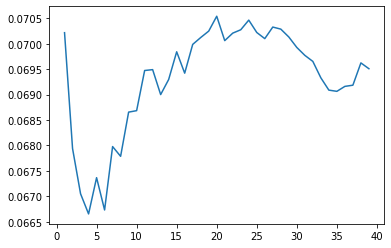

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,40),error)

In [ ]:
errorR2 = []

for k in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=k,n_jobs=5)
    knn.fit(X_train_s,y_train)
    y_pred = knn.predict(X_test_s)
    errorR2.append(r2_score(y_test,y_pred))

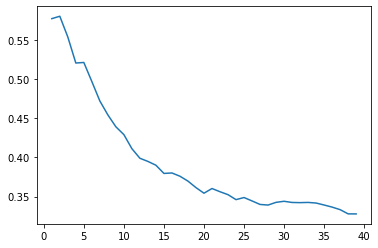

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,40),errorR2)

In [ ]:
errorMS = []

for k in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=k,n_jobs=5)
    knn.fit(X_train_s,y_train)
    y_pred = knn.predict(X_test_s)
    errorMS.append(mean_squared_error(y_test,y_pred))

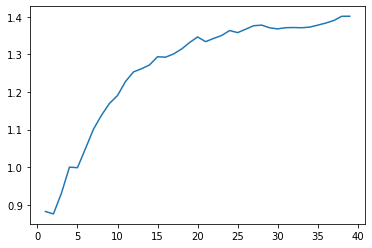

In [ ]:
plt.plot(range(1,40),errorMS)

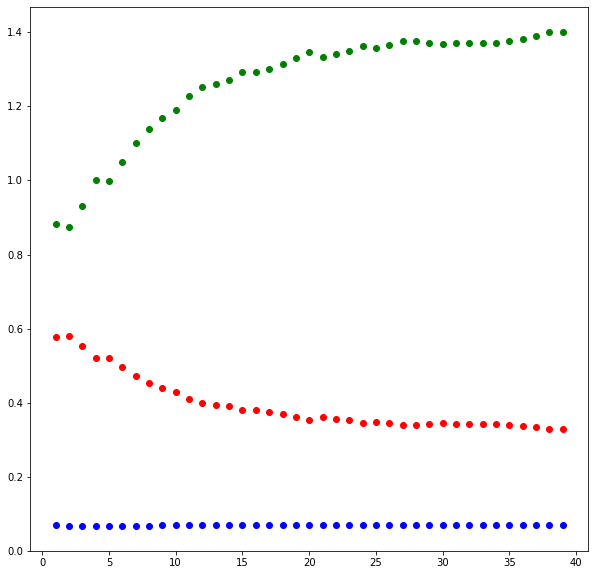

In [ ]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(range(1,40),error,'bo')
plt.plot(range(1,40),errorMS,'go')
plt.plot(range(1,40),errorR2,'ro')

In [ ]:
#bestk, k=2
knn = KNeighborsRegressor(n_neighbors=2,n_jobs=5)
knn.fit(X_train_s,y_train)
y_pred = knn.predict(X_test_s)

In [ ]:
print('mae %s' % mean_absolute_error(y_test,y_pred))
print('mse %s' % mean_squared_error(y_test,y_pred))
print('r2 %s' % r2_score(y_test,y_pred))

mae 0.06794050007339629
mse 0.875678915692127
r2 0.5799136525499411


# Regressione lineare

In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [15]:
y_pred = reg.predict(X_test_s)

In [16]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -2.959
MSE: 8.253
MAE: 0.415


# Lasso

In [10]:
reg = Lasso()
reg.fit(X_train_s,y_train)

Lasso()

In [11]:
y_pred = reg.predict(X_test_s)

In [12]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.503
MSE: 3.133
MAE: 0.209


# Ridge

In [ ]:
reg = Ridge()
reg.fit(X_train_s,y_train)

Ridge()

In [ ]:
y_pred = reg.predict(X_test_s)

In [ ]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -2.968
MSE: 8.272
MAE: 0.396


In [ ]:
clf = KNeighborsRegressor(n_neighbors=7,n_jobs=5)
clf.fit(X_train_s, y_train)

KNeighborsRegressor(n_jobs=5, n_neighbors=7)

In [ ]:
y_pred = clf.predict(X_test_s)

In [ ]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.553
MSE: 0.590
MAE: 0.066


# Dataset Veicoli (eliminare attributi relativi all'area)

In [ ]:
df3 = pd.DataFrame(df2) #dataframe con attributi relativi ai veicoli

In [ ]:
del df3['NumberTotalPointInterestA']
del df3['NumberCulturalPointA']
del df3['NumberEducationPointA']
del df3['NumberEnterteimentPointA']
del df3['NumberFinancePointA']
del df3['NumberHealthPointA']
del df3['NumberTrasportationPointA']
del df3['NumberTotalPointInterestB']
del df3['NumberCulturalPointB']
del df3['NumberEducationPointB']
del df3['NumberEnterteimentPointB']
del df3['NumberFinancePointB']
del df3['NumberHealthPointB']
del df3['NumberTrasportationPointB']

# Train & test split (Dataframe Veicoli)

In [ ]:
from sklearn.model_selection import train_test_split
class_name = 'y'

attributes = [col for col in df3.columns if col != class_name]
X = df3[attributes].values
y=df3[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()


X_train_s = scaler.fit_transform(X_train)

X_test_s=scaler.transform(X_test)

# KNN (DataFrame Veicoli)

# Find Best K (DataFrame Veicoli)

In [ ]:
errorR2 = []
errorMAE = []
errorMSE =[]

for k in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=k,n_jobs=-1,algorithm='kd_tree')
    knn.fit(X_train_s,y_train)
    y_pred = knn.predict(X_test_s)
    errorR2.append(r2_score(y_test,y_pred))
    errorMAE.append(mean_absolute_error(y_test,y_pred))
    errorMSE.append(mean_squared_error(y_test,y_pred))
    print('end')

end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end


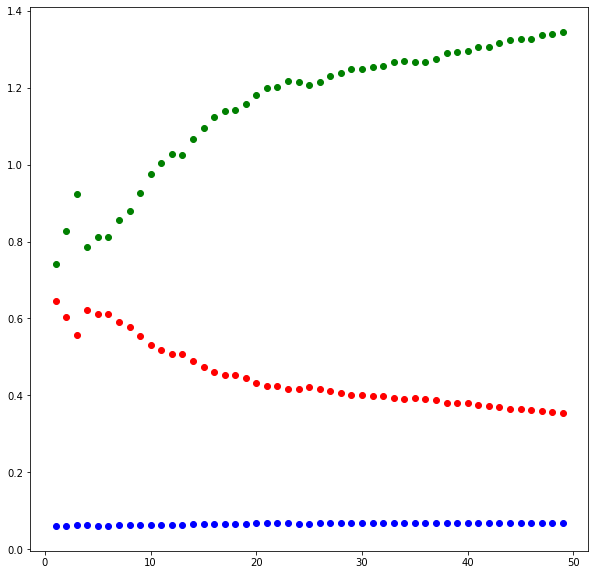

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(range(1,50),errorMAE,'bo')
plt.plot(range(1,50),errorMSE,'go')
plt.plot(range(1,50),errorR2,'ro')

In [ ]:
# best k = 1

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=1, n_jobs= -1,algorithm='kd_tree')

In [ ]:
knn.fit(X_train_s,y_train)

KNeighborsRegressor(algorithm='kd_tree', n_jobs=-1, n_neighbors=1)

In [ ]:
y_pred = knn.predict(X_test_s)

In [ ]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.644
MSE: 0.742
MAE: 0.061


# Regressione Lineare (DataFrame Veicoli)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test_s)

In [ ]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.011
MSE: 2.107
MAE: 0.256


# Lasso (DataFrameVeicoli)

In [ ]:
reg = Lasso()
reg.fit(X_train_s, y_train)

Lasso()

In [ ]:
y_pred = reg.predict(X_test_s)

In [ ]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.006
MSE: 2.098
MAE: 0.246


# Ridge (DataFrame Veicoli)

In [ ]:
reg = Ridge()
reg.fit(X_train_s, y_train)

Ridge()

In [ ]:
y_pred = reg.predict(X_test_s)

In [ ]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.011
MSE: 2.107
MAE: 0.256


# DataFrame Punti di Interesse

In [6]:
df4 = pd.DataFrame()

In [7]:
df4['NumberTotalPointInterestA'] = df2['NumberTotalPointInterestA'] 
df4['NumberCulturalPointA'] = df2['NumberCulturalPointA']
df4['NumberEducationPointA'] = df2['NumberEducationPointA']
df4['NumberEnterteimentPointA'] = df2['NumberEnterteimentPointA']
df4['NumberFinancePointA'] = df2['NumberFinancePointA']
df4['NumberHealthPointA'] = df2['NumberHealthPointA']
df4['NumberTrasportationPointA'] = df2['NumberTrasportationPointA']
df4['NumberTotalPointInterestB'] = df2['NumberTotalPointInterestB']
df4['NumberCulturalPointB'] = df2['NumberCulturalPointB']
df4['NumberEducationPointB'] = df2['NumberEducationPointB']
df4['NumberEnterteimentPointB'] = df2['NumberEnterteimentPointB'] 
df4['NumberFinancePointB'] = df2['NumberFinancePointB']
df4['NumberHealthPointB'] = df2['NumberHealthPointB']
df4['NumberTrasportationPointB'] = df2['NumberTrasportationPointB']
df4['y'] = df2['y']

In [8]:
df4

,NumberTotalPointInterestA,NumberCulturalPointA,NumberEducationPointA,NumberEnterteimentPointA,NumberFinancePointA,NumberHealthPointA,NumberTrasportationPointA,NumberTotalPointInterestB,NumberCulturalPointB,NumberEducationPointB,NumberEnterteimentPointB,NumberFinancePointB,NumberHealthPointB,NumberTrasportationPointB,y
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0
2,0,0,0,0,0,0,0,4,2,0,0,0,1,1,0
3,0,0,0,0,0,0,0,3,0,0,0,0,2,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68116,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
68117,0,0,0,0,0,0,0,2,0,1,0,0,1,0,0
68118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Train & test split (DataFrame Punti di Interesse)

In [19]:
class_name = 'y'

attributes = [col for col in df4.columns if col != class_name]
X = df4[attributes].values
y=df4[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()


X_train_s = scaler.fit_transform(X_train)

X_test_s=scaler.transform(X_test)

# KNN (DataFrame Punti di Interesse)

# Find Best K

In [12]:
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
errorR2 = []
errorMAE = []
errorMSE =[]

for k in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=k,n_jobs=-1,algorithm='kd_tree')
    knn.fit(X_train_s,y_train)
    y_pred = knn.predict(X_test_s)
    errorR2.append(r2_score(y_test,y_pred))
    errorMAE.append(mean_absolute_error(y_test,y_pred))
    errorMSE.append(mean_squared_error(y_test,y_pred))
    print('end')

end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end
end


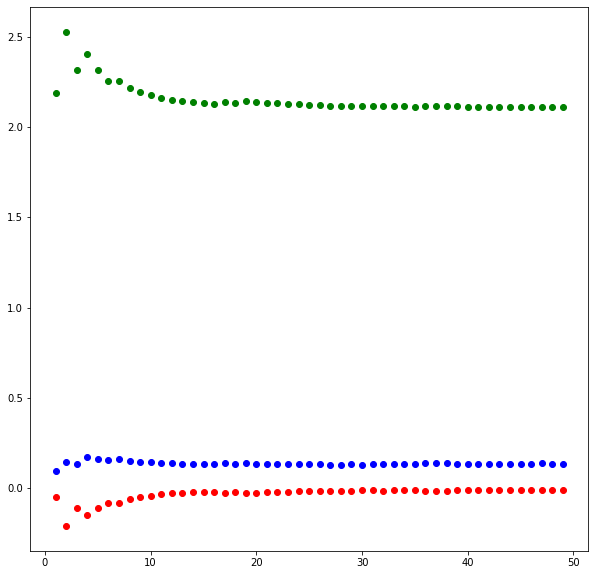

In [13]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(range(1,50),errorMAE,'bo')
plt.plot(range(1,50),errorMSE,'go')
plt.plot(range(1,50),errorR2,'ro')

# Regressione Lineare

In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_pred = reg.predict(X_test_s)

In [17]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.011
MSE: 2.107
MAE: 0.256


# Lasso

In [26]:
reg = Lasso()
reg.fit(X_train_s, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
y_pred = reg.predict(X_test_s)

In [28]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.006
MSE: 2.098
MAE: 0.246


# Ridge

In [31]:
reg = Ridge(random_state=100)
reg.fit(X_train_s, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=100, solver='auto', tol=0.001)

In [32]:
y_pred = reg.predict(X_test_s)

In [33]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.011
MSE: 2.107
MAE: 0.256


# Divisione della città (NORD-SUD-EST-OVEST)

In [1]:
import pandas as pd
import geopandas as gpd
from polygeohasher import polygeohasher
import json
gdf = gpd.read_file('./prova.geojson')
primary_df = polygeohasher.create_geohash_list(gdf,5,inner=False)
geo_df = polygeohasher.geohashes_to_geometry(primary_df,"geohash_list")
geo_df.to_file("SanFranciscoGrid.geojson",driver = "GeoJSON")
SanFranGrid = json.load(open('SanFranciscoGrid.geojson','r'))


In [2]:
import folium
m = folium.Map([37.80, -112.26], zoom_start=12)
folium.GeoJson(SanFranGrid, name="geojson").add_to(m)
m

In [3]:
from shapely import wkt
geo_df.to_csv("Tassellation.csv") #solito problema per ordinare il geodataframe
tasselation = pd.read_csv("./Tassellation.csv")
del tasselation["Unnamed: 0"]
tasselation['geometry'] = tasselation['geometry'].apply(wkt.loads)
geo_tassellation = gpd.GeoDataFrame(
    tasselation,geometry='geometry')

In [4]:
new_geo = geo_tassellation.drop_duplicates(subset='geohash_list')

In [5]:
new_geo = new_geo.reset_index()

In [6]:
del new_geo['index']

In [7]:
new_geo

,name,cartodb_id,created_at,updated_at,geohash_list,geometry
0,Seacliff,1,2013-02-10T05:44:04.653000+00:00,2013-02-10T05:44:04.923000+00:00,9q8yu,"POLYGON ((-122.51953 37.74902, -122.47559 37.7..."
1,Marina,20,2013-02-10T05:44:04.653000+00:00,2013-02-10T05:44:04.923000+00:00,9q8zj,"POLYGON ((-122.47559 37.79297, -122.43164 37.7..."
2,Marina,20,2013-02-10T05:44:04.653000+00:00,2013-02-10T05:44:04.923000+00:00,9q8zn,"POLYGON ((-122.43164 37.79297, -122.38770 37.7..."
3,Pacific Heights,23,2013-02-10T05:44:04.653000+00:00,2013-02-10T05:44:04.923000+00:00,9q8yv,"POLYGON ((-122.47559 37.74902, -122.43164 37.7..."
4,Pacific Heights,23,2013-02-10T05:44:04.653000+00:00,2013-02-10T05:44:04.923000+00:00,9q8yy,"POLYGON ((-122.43164 37.74902, -122.38770 37.7..."
5,Excelsior,13,2013-02-10T05:44:04.653000+00:00,2013-02-10T05:44:04.923000+00:00,9q8yw,"POLYGON ((-122.43164 37.70508, -122.38770 37.7..."
6,Excelsior,13,2013-02-10T05:44:04.653000+00:00,2013-02-10T05:44:04.923000+00:00,9q8yt,"POLYGON ((-122.47559 37.70508, -122.43164 37.7..."
7,South of Market,30,2013-02-10T05:44:04.653000+00:00,2013-02-10T05:44:04.923000+00:00,9q8yz,"POLYGON ((-122.38770 37.74902, -122.34375 37.7..."
8,Bayview,21,2013-02-10T05:44:04.653000+00:00,2013-02-10T05:44:04.923000+00:00,9q8yx,"POLYGON ((-122.38770 37.70508, -122.34375 37.7..."
9,Inner Sunset,6,2013-02-10T05:44:04.653000+00:00,2013-02-10T05:44:04.923000+00:00,9q8ys,"POLYGON ((-122.51953 37.70508, -122.47559 37.7..."


In [8]:
gdf = gpd.read_file('./prova.geojson')
primary_df = polygeohasher.create_geohash_list(gdf,6,inner=False)
geo_df = polygeohasher.geohashes_to_geometry(primary_df,"geohash_list")
geo_df.to_file("SanFranciscoGrid.geojson",driver = "GeoJSON")
SanFranGrid = json.load(open('SanFranciscoGrid.geojson','r'))

In [9]:
geo_df.to_csv("Tassellation.csv") #solito problema per ordinare il geodataframe
tasselation = pd.read_csv("./Tassellation.csv")
del tasselation["Unnamed: 0"]
tasselation['geometry'] = tasselation['geometry'].apply(wkt.loads)
geo_tassellation = gpd.GeoDataFrame(
    tasselation,geometry='geometry')

In [10]:
sixGeo = geo_tassellation.drop_duplicates(subset='geohash_list')

In [11]:
sixGeo = sixGeo.reset_index()

In [12]:
del sixGeo['index']

In [17]:
i = 0
areaLen = len(allArea['geohash_list'])
sixLen= len(sixGeo['geohash_list'])
result =[]

while(i<areaLen):
    j=0
    find = 0
    while(j<sixLen and find !=1 ):
        if(sixGeo['geohash_list'][j]==allArea['geohash_list'][i]):
            result.append(sixGeo['geometry'][j])
            find = 1
        else:    
            j=j+1  
    i=i+1

In [18]:
allArea['geometry'] = result

In [19]:
from shapely.geometry import Point, Polygon
def checkPolygon(allArea,new_geo):
    i = 0
    find = 0
    result = []
    areaLen = len(allArea['geohash_list'])
    geoLen = len(new_geo['geohash_list'])
    while(i<areaLen):
        if(allArea['geometry'][i].within(new_geo['geometry'][0])):
            result.append('OVEST')
        elif(allArea['geometry'][i].within(new_geo['geometry'][1])):
            result.append('NORD')
        elif(allArea['geometry'][i].within(new_geo['geometry'][2])):
            result.append('NORD')
        elif(allArea['geometry'][i].within(new_geo['geometry'][3])):
            result.append('NORD-SUD')
        elif(allArea['geometry'][i].within(new_geo['geometry'][4])):
            result.append('NORD-SUD')
        elif(allArea['geometry'][i].within(new_geo['geometry'][5])):
            result.append('SUD')
        elif(allArea['geometry'][i].within(new_geo['geometry'][6])):
            result.append('SUD')
        elif(allArea['geometry'][i].within(new_geo['geometry'][7])):
            result.append('EST')
        elif(allArea['geometry'][i].within(new_geo['geometry'][8])):
            result.append('SUD-EST')
        elif(allArea['geometry'][i].within(new_geo['geometry'][9])):
            result.append('SUD-OVEST')
        elif(allArea['geometry'][i].within(new_geo['geometry'][10])):
            result.append('NORD-EST')
        elif(allArea['geometry'][i].within(new_geo['geometry'][11])):
            result.append('NORD-OVEST')
        i=i+1
    return result

In [20]:
result = checkPolygon(allArea,new_geo)

In [21]:
allArea['Direction'] = result

In [3]:
import pandas as pd
df2Centro = pd.read_csv('./../San-Francisco/TransferLearning/dfCentroSanFran.csv')
df2Nord = pd.read_csv('./../San-Francisco/TransferLearning/dfNordSanFran.csv')
df2Sud = pd.read_csv('./../San-Francisco/TransferLearning/dfSudSaFran.csv')


del df2Centro['Unnamed: 0']
del df2Sud['Unnamed: 0']
del df2Nord['Unnamed: 0']


# Training & test con Ovest e Sud

In [22]:
#devo creare rispettivamente le tabelle sia per ovest che per sud
def createTable(allArea):
    i = 0
    idPartenza = []
    idArrivo = []
    allAreaLen = len(allArea['geohash_list'])
    while(i<allAreaLen):
        j=0
        while(j<allAreaLen):
            idPartenza.append(allArea['geohash_list'][i])
            idArrivo.append(allArea['geohash_list'][j])
            j=j+1
        i=i+1
    df = pd.DataFrame()
    df['IdPartenza'] = idPartenza
    df['IdArrivo'] = idArrivo
    return df

In [23]:
def y(df1,allStart):
    i = 0
    result = []
    alldf1Len = len(df1['IdArrivo'])
    while(i<alldf1Len):
        areaPartenza = allStart[allStart.geohash_area == df1['IdPartenza'][i]]
        areaPartenza1 = areaPartenza[areaPartenza.end == df1['IdArrivo'][i]]

        result.append(len(areaPartenza1))

        i=i+1
    return result

In [24]:
def createSet(allArea):
    i = 0
    StartingVehicleA = []
    EndingVehicles =[]
    TotNumberRecordVehicles =[]
    maxSpeed_km =[]
    AverageSpeed =[]
    OutEdges =[]
    InEdges =[]
    VehiclesNight =[]
    VehiclesMorning =[]
    VehiclesAfternoon =[]
    VehiclesEvening =[]
    Density_n =[]
    AccelarationMax =[]
    AverageAcceleration =[]
    NumberTotalPointInterest =[]
    NumberCulturalPoint =[]
    NumberFinancePoint =[]
    NumberHealthPoint =[]
    NumberTrasportationPoint =[]
    NumberEducationPoint = []
    NumberEnterteimentPoint = []
    RecordWeekend =[]
    RecordWeek =[]

    StartingVehicleB = []
    EndingVehiclesB =[]
    TotNumberRecordVehiclesB =[]
    maxSpeed_kmB =[]
    AverageSpeedB =[]
    OutEdgesB =[]
    InEdgesB =[]
    VehiclesNightB =[]
    VehiclesMorningB =[]
    VehiclesAfternoonB =[]
    VehiclesEveningB =[]
    Density_nB =[]
    AccelarationMaxB =[]
    AverageAcceleration_mB =[]
    NumberTotalPointInterestB =[]
    NumberCulturalPointB =[]
    NumberFinancePointB =[]
    NumberHealthPointB =[]
    NumberTrasportationPointB =[]
    NumberEducationPointB =[]
    NumberEnterteimentPointB =[]
    RecordWeekendB =[]
    RecordWeekB =[]


    allAreaLen = len(allArea['geohash_list'])
    while(i<allAreaLen):
        j=0
        while(j<allAreaLen):

            StartingVehicleA.append(allArea['StartingVehicles'][i])
            EndingVehicles.append(allArea['EndingVehicles'][i])
            TotNumberRecordVehicles.append(allArea['TotNumberRecordVehicles'][i])
            maxSpeed_km.append(allArea['maxSpeed_km/h'][i])
            AverageSpeed.append(allArea['AverageSpeed'][i])
            OutEdges.append(allArea['OutEdges'][i])
            InEdges.append(allArea['InEdges'][i])
            VehiclesNight.append(allArea['VehiclesNight(24-5 am)'][i])
            VehiclesMorning.append(allArea['VehiclesMorning(6-12 am)'][i])
            VehiclesAfternoon.append(allArea['VehiclesAfternoon(13-18 pm)'][i])
            VehiclesEvening.append(allArea['VehiclesEvening(19-23 pm)'][i])
            Density_n.append(allArea['Density_n/km^2'][i])
            AccelarationMax.append(allArea['AccelarationMax'][i])
            AverageAcceleration.append(allArea['AverageAcceleration_m/s^2'][i])
            NumberTotalPointInterest.append(allArea['NumberTotalPointInterest'][i])
            NumberCulturalPoint.append(allArea['NumberCulturalPoint("Museum-Attraction-Ruins")'][i])
            NumberEducationPoint.append(allArea['NumberEducationPoint("University-Library")'][i])
            NumberEnterteimentPoint.append(allArea['NumberEnterteimentPoint("Cinema-Theatre-Zoo-Stadium-SwimmingPool")'][i])
            NumberFinancePoint.append(allArea['NumberFinancePoint("Bank-Company")'][i])
            NumberHealthPoint.append(allArea['NumberHealthPoint("Hospital-Dentist-Pharmacy")'][i])
            NumberTrasportationPoint.append(allArea['NumberTrasportationPoint("Fuel-BusStation-TaxiStop")'][i])
            RecordWeekend.append(allArea['RecordWeekend'][i])
            RecordWeek.append(allArea['RecordWeek'][i])






            #B


            StartingVehicleB.append(allArea['StartingVehicles'][j])
            EndingVehiclesB.append(allArea['EndingVehicles'][j])
            TotNumberRecordVehiclesB.append(allArea['TotNumberRecordVehicles'][j])
            maxSpeed_kmB.append(allArea['maxSpeed_km/h'][j])
            AverageSpeedB.append(allArea['AverageSpeed'][j])
            OutEdgesB.append(allArea['OutEdges'][j])
            InEdgesB.append(allArea['InEdges'][j])
            VehiclesNightB.append(allArea['VehiclesNight(24-5 am)'][j])
            VehiclesMorningB.append(allArea['VehiclesMorning(6-12 am)'][j])
            VehiclesAfternoonB.append(allArea['VehiclesAfternoon(13-18 pm)'][j])
            VehiclesEveningB.append(allArea['VehiclesEvening(19-23 pm)'][j])
            Density_nB.append(allArea['Density_n/km^2'][j])
            AccelarationMaxB.append(allArea['AccelarationMax'][j])
            AverageAcceleration_mB.append(allArea['AverageAcceleration_m/s^2'][j])
            NumberTotalPointInterestB.append(allArea['NumberTotalPointInterest'][j])
            NumberCulturalPointB.append(allArea['NumberCulturalPoint("Museum-Attraction-Ruins")'][j])
            NumberEducationPointB.append(allArea['NumberEducationPoint("University-Library")'][j])
            NumberEnterteimentPointB.append(allArea['NumberEnterteimentPoint("Cinema-Theatre-Zoo-Stadium-SwimmingPool")'][j])
            NumberFinancePointB.append(allArea['NumberFinancePoint("Bank-Company")'][j])
            NumberHealthPointB.append(allArea['NumberHealthPoint("Hospital-Dentist-Pharmacy")'][j])
            NumberTrasportationPointB.append(allArea['NumberTrasportationPoint("Fuel-BusStation-TaxiStop")'][j])
            RecordWeekendB.append(allArea['RecordWeekend'][j])
            RecordWeekB.append(allArea['RecordWeek'][j])




            j=j+1
        i=i+1
    df2 = pd.DataFrame()
    df2['StartingVehiclesA'] = StartingVehicleA
    df2['EndingVehiclesA'] = EndingVehicles
    df2['TotNumberRecordVehiclesA'] = TotNumberRecordVehicles
    df2['maxSpeedKm/hA'] = maxSpeed_km
    df2['AverageSpeedA'] = AverageSpeed
    df2['OutEdgesA'] =OutEdges
    df2['InEdgesA'] =InEdges
    df2['VehiclesNightA'] = VehiclesNight
    df2['VehiclesMorningA'] =VehiclesMorning
    df2['VehiclesAfternoonA'] = VehiclesAfternoon
    df2['VehiclesEveningA'] =VehiclesEvening
    df2['Density_n/km^2A'] =Density_n
    df2['AccelerationMaxA'] = AccelarationMax
    df2['AverageAccelerationA'] = AverageAcceleration
    df2['NumberTotalPointInterestA'] = NumberTotalPointInterest
    df2['NumberCulturalPointA'] = NumberCulturalPoint
    df2['NumberEducationPointA']= NumberEducationPoint
    df2['NumberEnterteimentPointA'] = NumberEnterteimentPoint
    df2['NumberFinancePointA'] = NumberFinancePoint
    df2['NumberHealthPointA'] = NumberHealthPoint
    df2['NumberTrasportationPointA'] = NumberTrasportationPoint
    df2['RecordWeekendA'] = RecordWeekend
    df2['RecordWeekA'] = RecordWeek


    #B

    df2['StartingVehiclesB'] = StartingVehicleB
    df2['EndingVehiclesB'] = EndingVehiclesB
    df2['TotNumberRecordVehiclesB'] = TotNumberRecordVehiclesB
    df2['maxSpeedKm/hB'] = maxSpeed_kmB
    df2['AverageSpeedB'] = AverageSpeedB
    df2['OutEdgesB'] =OutEdgesB
    df2['InEdgesB'] =InEdgesB
    df2['VehiclesNightB'] = VehiclesNightB
    df2['VehiclesMorningB'] =VehiclesMorningB
    df2['VehiclesAfternoonB'] = VehiclesAfternoonB
    df2['VehiclesEveningB'] =VehiclesEveningB
    df2['Density_n/km^2B'] =Density_nB
    df2['AccelerationMaxB'] = AccelarationMaxB
    df2['AverageAccelerationB'] = AverageAcceleration_mB
    df2['NumberTotalPointInterestB'] = NumberTotalPointInterestB
    df2['NumberCulturalPointB'] = NumberCulturalPointB
    df2['NumberEducationPointB'] = NumberEducationPointB
    df2['NumberEnterteimentPointB'] = NumberEnterteimentPointB
    df2['NumberFinancePointB'] = NumberFinancePointB
    df2['NumberHealthPointB'] = NumberHealthPointB
    df2['NumberTrasportationPointB'] = NumberTrasportationPointB
    df2['RecordWeekendB'] = RecordWeekendB
    df2['RecordWeekB'] = RecordWeekB
    
    return df2

In [25]:
#creazione dataframe solo Ovest
ovestGeoData = allArea[allArea.Direction == 'OVEST']
ovestGeoData = ovestGeoData.reset_index()
del ovestGeoData['index']

In [26]:
sudGeoData = allArea[allArea.Direction == 'SUD']
sudGeoData = sudGeoData.reset_index()
del sudGeoData['index']

In [27]:
dfOvest = createTable(ovestGeoData)

In [28]:
dfSud = createTable(sudGeoData)

In [29]:
yOvest = y(dfOvest,allStart)


In [30]:
ySud = y(dfSud,allStart)

In [31]:
df2Ovest = createSet(ovestGeoData)


In [32]:
df2Sud = createSet(sudGeoData)

In [33]:
df2Ovest['y'] = yOvest


In [34]:
df2Sud['y'] = ySud

# Train&Test 

In [78]:
#divido il dataframe in train e test
from sklearn.model_selection import train_test_split

In [79]:
#La Parte di train la effettuo su Ovest quella di test su Sud
class_name = 'y'

attributes = [col for col in df2Sud.columns if col != class_name]
X = df2Sud[attributes].values
y=df2Sud[class_name]


X1 = df2Ovest[attributes].values
y1=df2Ovest[class_name]

In [80]:
X_train = X
y_train = y

X_test = X1
y_test = y1

In [81]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()


X_train_s = scaler.fit_transform(X_train)

X_test_s=scaler.transform(X_test)

# KNN (Sud vs Ovest)

In [7]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [85]:
errorR2 = []
errorMSE =[]
errorMAE = []
for k in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_s,y_train)
    y_pred = knn.predict(X_test_s)
    errorR2.append(r2_score(y_test,y_pred))
    errorMAE.append(mean_absolute_error(y_test,y_pred))
    errorMSE.append(mean_squared_error(y_test,y_pred))

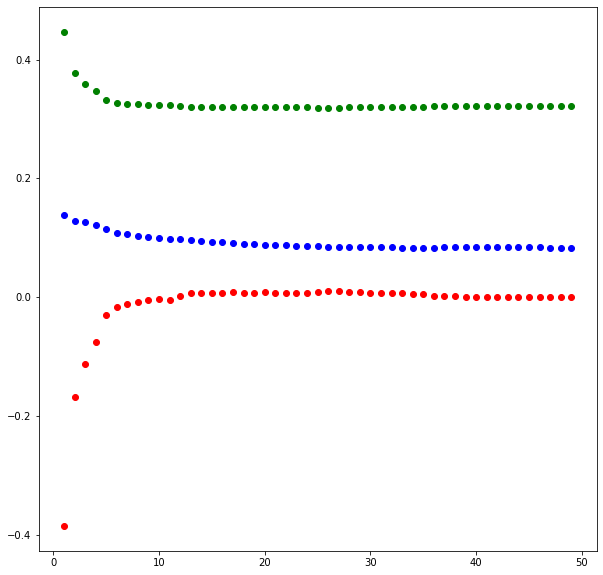

In [87]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(range(1,50),errorMAE,'bo')
plt.plot(range(1,50),errorMSE,'go')
plt.plot(range(1,50),errorR2,'ro')

# NORD VS SUD

In [35]:
#devo creare il dataframe del nord
nordGeoData = allArea[allArea.Direction == 'NORD']
nordGeoData = nordGeoData.reset_index()
del nordGeoData['index']

In [36]:
dfNord= createTable(nordGeoData)

In [37]:
yNord = y(dfNord,allStart)

In [38]:
df2Nord = createSet(nordGeoData)

In [39]:
df2Nord['y'] = yNord

In [95]:
df2Nord[attributes] = df2Nord[attributes].fillna(0)

# Training & test split (Nord vs Sud)

In [4]:
class_name = 'y'

attributes = [col for col in df2Nord.columns if col != class_name]
X = df2Nord[attributes].values
y=df2Nord[class_name]


X1 = df2Sud[attributes].values
y1=df2Sud[class_name]

In [28]:
X_train = X
y_train = y

X_test = X1
y_test = y1

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()


X_train_s = scaler.fit_transform(X_train)

X_test_s=scaler.transform(X_test)

In [30]:
knn = KNeighborsRegressor(n_neighbors=18,algorithm='kd_tree')
knn.fit(X_train_s,y_train)
y_pred = knn.predict(X_test_s)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.000
MSE: 6800.002
MAE: 2.051


In [99]:
errorR2 = []
errorMSE =[]
errorMAE = []
for k in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_s,y_train)
    y_pred = knn.predict(X_test_s)
    errorR2.append(r2_score(y_test,y_pred))
    errorMAE.append(mean_absolute_error(y_test,y_pred))
    errorMSE.append(mean_squared_error(y_test,y_pred))

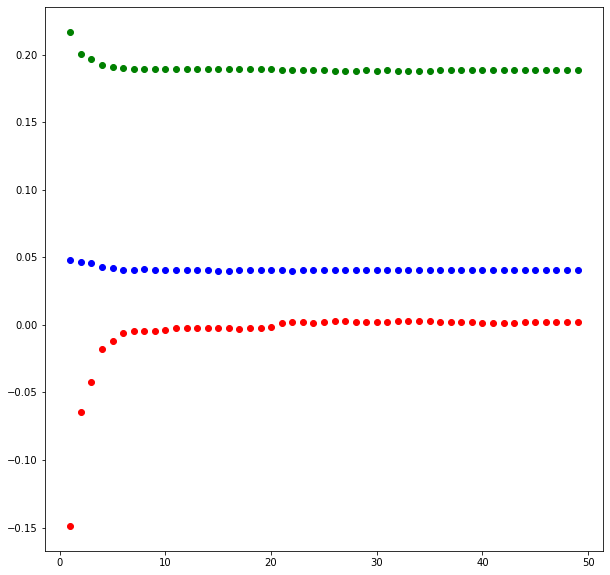

In [100]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(range(1,50),errorMAE,'bo')
plt.plot(range(1,50),errorMSE,'go')
plt.plot(range(1,50),errorR2,'ro')

# Centro vs Sud

In [40]:
centroGeoData = allArea[allArea.Direction == 'NORD-SUD']
centroGeoData = centroGeoData.reset_index()
del centroGeoData['index']

In [42]:
dfCentro= createTable(centroGeoData)
yCentro = y(dfCentro,allStart)
df2Centro = createSet(centroGeoData)
df2Centro['y'] = yCentro
#df2Centro[attributes] = df2Centro[attributes].fillna(0)

# Training & test(Centro vs Sud)

In [105]:
class_name = 'y'

attributes = [col for col in df2Centro.columns if col != class_name]
X = df2Centro[attributes].values
y=df2Centro[class_name]


X1 = df2Sud[attributes].values
y1=df2Sud[class_name]

In [106]:
X_train = X
y_train = y

X_test = X1
y_test = y1

In [107]:
scaler = StandardScaler()


X_train_s = scaler.fit_transform(X_train)

X_test_s=scaler.transform(X_test)

In [108]:
errorR2 = []
errorMSE =[]
errorMAE = []
for k in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_s,y_train)
    y_pred = knn.predict(X_test_s)
    errorR2.append(r2_score(y_test,y_pred))
    errorMAE.append(mean_absolute_error(y_test,y_pred))
    errorMSE.append(mean_squared_error(y_test,y_pred))

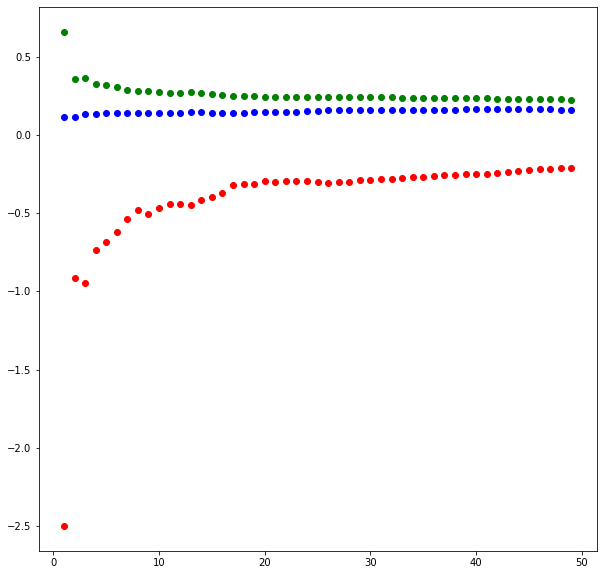

In [109]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(range(1,50),errorMAE,'bo')
plt.plot(range(1,50),errorMSE,'go')
plt.plot(range(1,50),errorR2,'ro')

In [44]:
df2Centro.to_csv('dfCentroSanFran.csv')
df2Nord.to_csv('dfNordSanFran.csv')
df2Sud.to_csv('dfSudSaFran.csv')

In [1]:
import numpy as np